## Addressing conversion rate for an Education company X 
An Education company X sells online courses to industry profiles. Company collects information of customers either by referrals or customers who have filled the forms while consuming content online.
Company gets a lot of leads and has a very poor conversion rate, which basically means Sales team effort is channeled to all the lead and finds it not to be very efficient.
Its implication is Company doesn’t focus on target customers who are highly likely to buy the course. The sales effort is directed toward the wrong customers and has no real impact on buying.
If it were focused on targeting potential customers, the Sales team could prioritize and spend further time explaining the course contents to convert customers


### Goals of the Case Study :

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads so that sales person cpuld use it to target a higher score leads. A higher score would mean that the lead is hot, i.e.customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance

### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing datasets
Leads_data = pd.read_csv("Leads.csv")


### Step 2: Inspecting the Dataframe

In [4]:
Leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe
Leads_data.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
Leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the type of each column
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Preparation

In [8]:
#Check for duplicate values
Leads_data.duplicated().any()

False

There arent any duplicates in this data

In [9]:
#checking missing values
total = Leads_data.isnull().sum().sort_values(ascending = False)
percent = (Leads_data.isnull().sum()/Leads_data.isnull().count()*100).round(2).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


There are many missing values in the columns as a general approach we will move ahead with removing those columns having higher null values of more than 20 % null values and also keeping prospect id as it is useful for the analysis

In [10]:
Cols_drop = ['Lead Number','How did you hear about X Education','Lead Profile',
                'Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score',
               'Asymmetrique Activity Index','Asymmetrique Profile Index','Tags']

In [11]:
#dropping unnecessary columns

Leads_data.drop(Cols_drop, 1, inplace = True)
len(Leads_data.columns)

28

In [12]:
Leads_data.shape

(9240, 28)

In [13]:
# Checking distinct values for each column
for x in Leads_data.columns:
    print(Leads_data[x].astype('category').value_counts())
    print("\n\n------------*-------------*------------------*------------------*-------------\n\n")

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64


------------*-------------*------------------*------------------*-------------


Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


------------*-------------*------------------*------------------*-------------


Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Weli

We find there are columns which has select as input, it could be that the user didnt select any option also on analysis we find columns like city and country is mostly dominated by one of the entries thus doesnt offer any variance .


In [14]:
Cols_drop = ['City','Country','I agree to pay the amount through cheque','Receive More Updates About Our Courses','Update me on Supply Chain Content'
            ,'What matters most to you in choosing a course','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums'
            ,'Newspaper','Digital Advertisement','Through Recommendations','Get updates on DM Content']
Leads_data = Leads_data.replace('Select', np.nan)

In [15]:
#dropping unnecessary columns

Leads_data.drop(Cols_drop, 1, inplace = True)
len(Leads_data.columns)

13

In [16]:
# Checking distinct values for each column
for x in Leads_data.columns:
    print(Leads_data[x].astype('category').value_counts())
    print("\n\n------------*-------------*------------------*------------------*-------------\n\n")

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64


------------*-------------*------------------*------------------*-------------


Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


------------*-------------*------------------*------------------*-------------


Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Weli

Now we are left with 12 columns, lets analyze these further


In [17]:
Leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,No,Modified


In [18]:
Leads_data.isnull().sum().sort_values(ascending=False)

Specialization                            3380
What is your current occupation           2690
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Occupation could be important factor for prediction, so we could go ahead with removing the rows with missing values


In [19]:
Leads_data = Leads_data[~pd.isna(Leads_data['What is your current occupation'])]

As all the columns seem to be important, we could proceed with removing the rows with null values


In [20]:
Leads_data = Leads_data[~pd.isna(Leads_data['Specialization'])]
Leads_data = Leads_data[~pd.isna(Leads_data['TotalVisits'])]
Leads_data = Leads_data[~pd.isna(Leads_data['Page Views Per Visit'])]
Leads_data = Leads_data[~pd.isna(Leads_data['Last Activity'])]
Leads_data = Leads_data[~pd.isna(Leads_data['Lead Source'])]

In [21]:
Leads_data.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [22]:
Leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website


We no more have any null values, we could proceed with data grooming step


#### Converting some binary variables (Yes/No) to 0/1

In [23]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Leads_data[varlist] = Leads_data[varlist].apply(binary_map)

In [24]:
Leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,0,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,0,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,0,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,Landing Page Submission,Organic Search,0,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,1,Email Opened
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,Landing Page Submission,Direct Traffic,0,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,1,Page Visited on Website


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [25]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                    'What is your current occupation','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
Leads_data = pd.concat([Leads_data, dummy1], axis=1)

In [26]:
Leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,0,1,2.0,1640,2.00,Email Opened,Supply Chain Management,...,0,0,0,1,0,0,0,0,0,0
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,Landing Page Submission,Organic Search,0,1,8.0,1351,8.00,Email Opened,Travel and Tourism,...,1,0,0,0,0,0,0,0,0,0
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,Landing Page Submission,Direct Traffic,0,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,...,0,0,0,0,0,1,0,0,0,0


#### Dropping the repeated variables

In [27]:
# We have created dummies for the below variables, so we can drop them
Leads_data = Leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                    'What is your current occupation','Last Notable Activity'], 1)

In [28]:
Leads_data.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.00,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.00,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,0,1,2.0,1640,2.00,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,0,1,8.0,1351,8.00,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,0,1,8.0,1343,2.67,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Checking for Outliers

In [29]:
# Checking for outliers in the continuous variables
Leads_data_num = Leads_data[['Total Time Spent on Website','TotalVisits']]

In [30]:
Leads_data_num.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,TotalVisits
count,4535.000000,4535.000000
mean,626.625358,4.293716
std,568.094959,5.451975
min,0.000000,0.000000
25%,127.000000,2.000000
50%,391.000000,3.000000
75%,1119.500000,5.000000
90%,1475.000000,8.000000
95%,1634.000000,11.000000
99%,1873.660000,19.000000


There is a outlier on Total visits as we could see max value and 99 percentile values are miles apart. We could visualize the same for better understanding

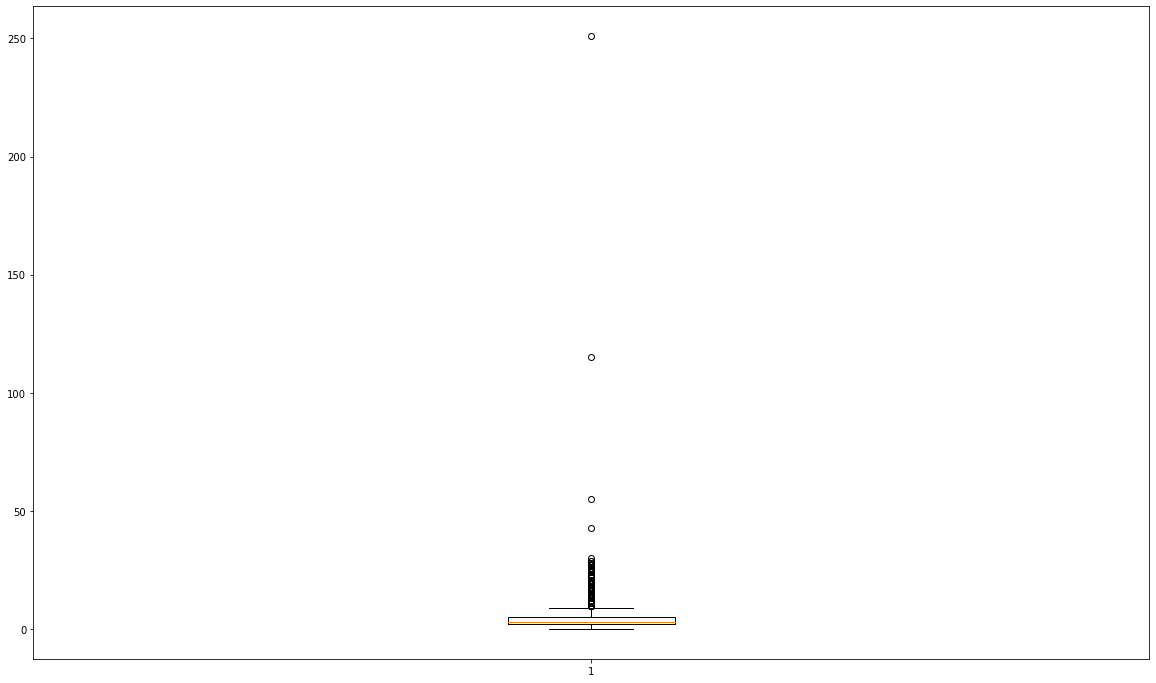

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
plt.boxplot(Leads_data_num['TotalVisits'])
plt.show()

We could cap this value or this could be relevant from business point of view as well to have higher visits

In [32]:
#Capping the data at 95% percetile value
Q4 = Leads_data['TotalVisits'].quantile(0.99) # Get 95th quantile
Leads_data.loc[Leads_data['TotalVisits'] >= Q4, 'TotalVisits'] = Q4 # outlier capping

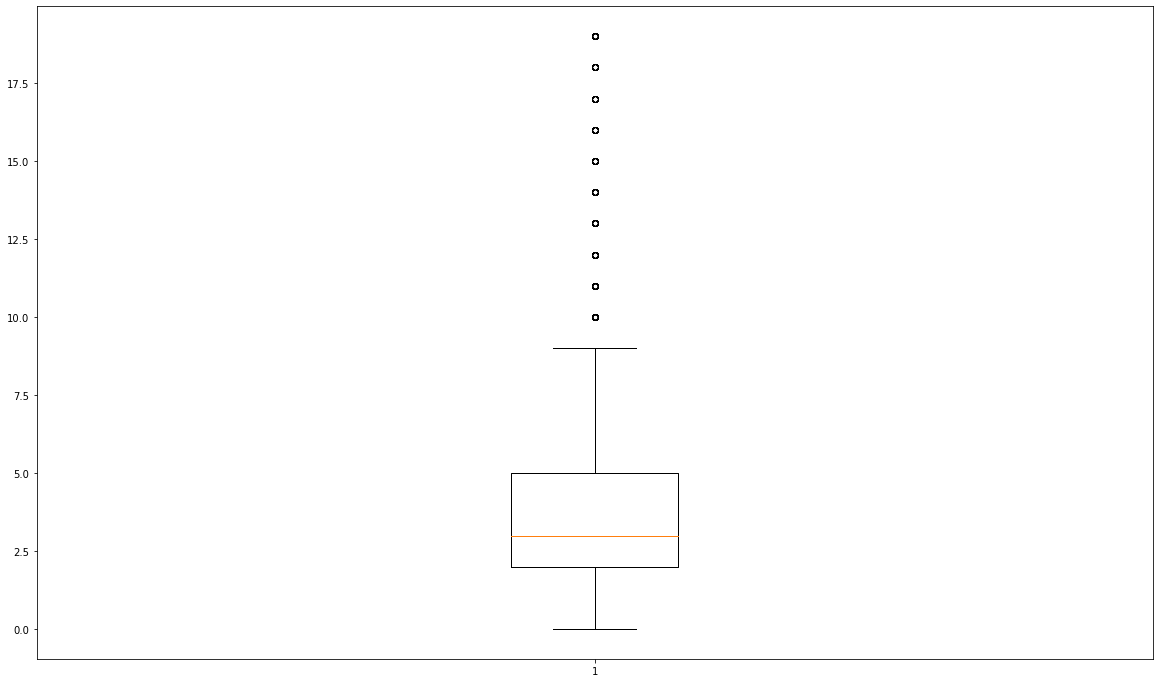

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
plt.boxplot(Leads_data['TotalVisits'])
plt.show()

### Step 4: Test-Train Split


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Putting feature variable to X
X = Leads_data.drop(['Converted','Prospect ID'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,0,2.0,1532,2.00,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,2.0,1640,2.00,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,0,8.0,1351,8.00,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,0,8.0,1343,2.67,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
# Putting response variable to y
y = Leads_data['Converted']

y.head()

2     1
3     0
6     1
10    1
11    1
Name: Converted, dtype: int64

In [37]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2006,0,2.939640,-0.648184,1.845831,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5140,0,0.247569,-1.076675,-0.588172,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7588,0,-0.051549,-1.044935,0.475848,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5244,0,0.546688,-0.819228,0.019187,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8663,1,2.042283,-0.762801,0.325150,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
### Checking the conversion Rate
Conversion_rate = (sum(Leads_data['Converted'])/len(Leads_data['Converted'].index))*100
Conversion_rate

51.06945975744212

If we check the whole corpus of data around 51% of leads seems to be converted to purchase

### Step 6: Looking at Correlations

In [41]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

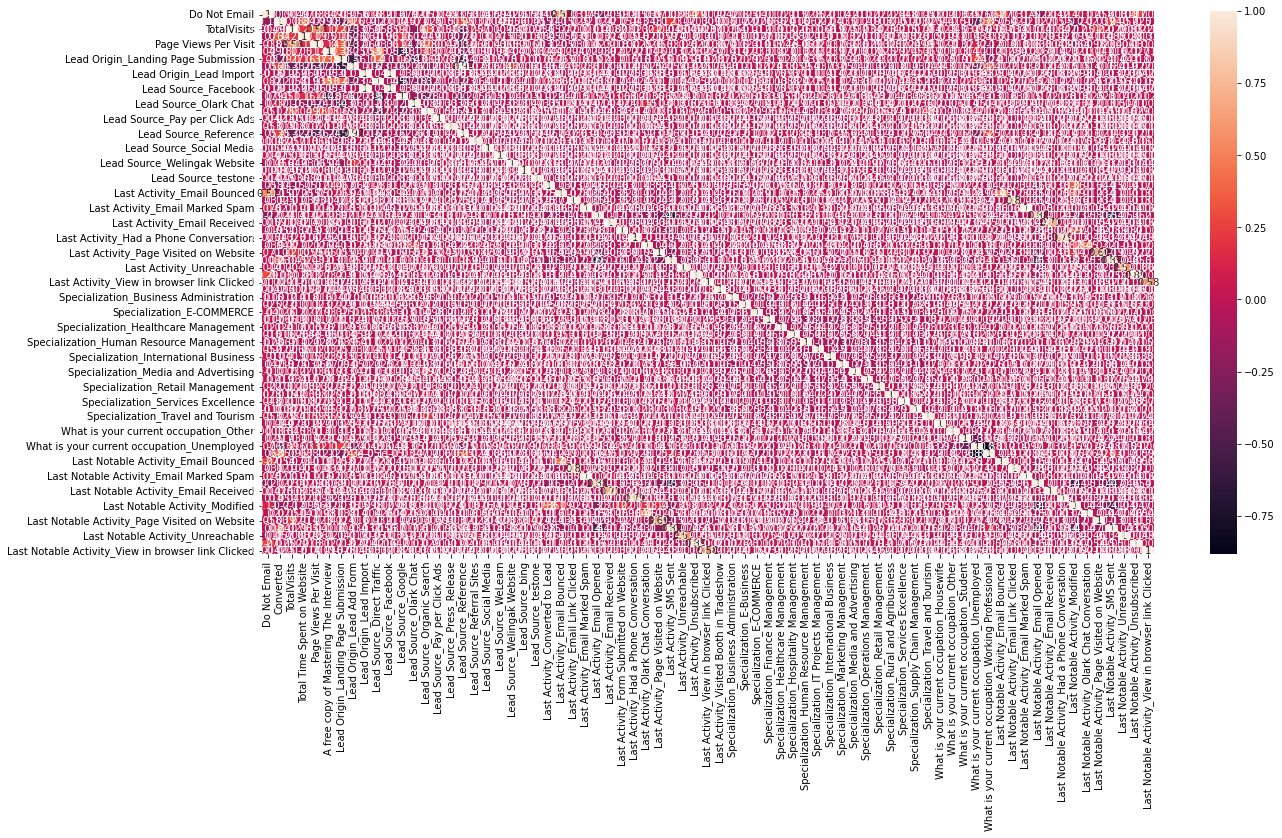

In [42]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Leads_data.corr(),annot = True)
plt.show()

Its not evident with this curve if we have a correlation as there are 71 columns

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

### Model 1
Lets build a model keeping all predictors

In [43]:
import statsmodels.api as sm

In [44]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3105
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 25 May 2023   Deviance:                   1.0435e+05
Time:                        10:42:03   Pearson chi2:                 5.10e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  3.89e+15   9.36e+07   4.16e+07      0.000    3.89e+15    3.89e+15
Do Not Email                                          1.022e+15   6.43e+06   1.59e+08      0.000    1.02e+15    1.02e+15
TotalVisits                                           1.175e+13    1.6e+06   7.36e+06      0.000    1.17e+13    1.17e+13
Total Time Spent on Website                           5.577e+14   1.29e+06   4.33e+08      0.000    5.58e+14    5.58e+14
Page Views Per Visit                                 -1.705e+14   1.61e+06  -1.06e+08      0.000    -1.7e+14    -1.7e+14
A free copy of Mastering The Interview                3.932e+14   3.22e+06   1.22e+08      0.000    3.93e+14    3.93e+14
Lead Origin_Landing Page Submission                  -8.497e+14   4.69e+06  -1.81e+08      0.000    -8.5e+14    -8.5e+14
Lead Origin_Lead Add Form                             1.304e+15   4.77e+07   2.73e+07      0.000     1.3e+15     1.3e+15
Lead Origin_Lead Import                               2.146e+15   4.32e+07   4.97e+07      0.000    2.15e+15    2.15e+15
Lead Source_Direct Traffic                            3.161e+15   8.26e+07   3.83e+07      0.000    3.16e+15    3.16e+15
Lead Source_Facebook                                  2.146e+15   4.32e+07   4.97e+07      0.000    2.15e+15    2.15e+15
Lead Source_Google                                     3.09e+15   8.25e+07   3.74e+07      0.000    3.09e+15    3.09e+15
Lead Source_Olark Chat                                3.183e+15   8.25e+07   3.86e+07      0.000    3.18e+15    3.18e+15
Lead Source_Organic Search                            2.829e+15   8.26e+07   3.42e+07      0.000    2.83e+15    2.83e+15
Lead Source_Pay per Click Ads                         1.245e+15   1.07e+08   1.17e+07      0.000    1.25e+15    1.25e+15
Lead Source_Press_Release                            -1.262e+15   1.07e+08  -1.18e+07      0.000   -1.26e+15   -1.26e+15
Lead Source_Reference                                 3.172e+15   6.75e+07    4.7e+07      0.000    3.17e+15    3.17e+15
Lead Source_Referral Sites                            3.435e+15   8.43e+07   4.08e+07      0.000    3.43e+15    3.43e+15
Lead Source_Social Media                              1.408e+14   1.07e+08   1.32e+06      0.000    1.41e+14    1.41e+14
Lead Source_WeLearn                                   8.454e+15   1.07e+08   7.93e+07      0.000    8.45e+15    8.45e+15
Lead Source_Welingak Website                          7.701e+15   7.09e+07   1.09e+08      0.000     7.7e+15     7.7e+15
Lead Source_bing                                      2.527e+15   9.53e+07   2.65e+07      0.000    2.53e+15    2.53e+15
Lead Source_testone                                   1.56

All variables are significant from our initial observation 

##### Assessing the model with StatsModels

In [45]:
# Getting the predicted values on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

2006    0.0
5140    0.0
7588    0.0
5244    0.0
8663    0.0
734     0.0
4481    1.0
971     1.0
5106    0.0
869     1.0
dtype: float64

##### Creating a dataframe with the actual conversion  flag and the predicted probabilities

In [46]:
y_train_pred_model1 = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_model1['Prospect ID'] = y_train.index
y_train_pred_model1.tail()

,Converted,Conversion_Prob,Prospect ID
8514,1,0.0,8514
4243,0,0.0,4243
942,1,0.0,942
164,1,0.0,164
8099,1,1.0,8099


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [47]:
y_train_pred_model1['predicted'] = y_train_pred_model1.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_model1.head()

,Converted,Conversion_Prob,Prospect ID,predicted
2006,0,0.0,2006,0
5140,0,0.0,5140,0
7588,1,0.0,7588,0
5244,0,0.0,5244,0
8663,0,0.0,8663,0


In [48]:
from sklearn import metrics

In [49]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_model1.Converted, y_train_pred_model1.predicted )
print(confusion)

[[1345  208]
 [ 925  696]]


In [50]:
# Predicted     not_churn    churn
# Actual
# not_churn        1345      208
# churn            925       696

In [51]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_model1.Converted, y_train_pred_model1.predicted))

0.643037177063642


### As there are 71 columns we could use Coarse tuning using RFE and arrive at 15 columns and then do fine tuning manually

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [53]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [54]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False,  True, False, False, False, False,  True, False, False])

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('A free copy of Mastering The Interview', False, 30),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', False, 19),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Pay per Click Ads', False, 33),
 ('Lead Source_Press_Release', False, 51),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Social Media', False, 40),
 ('Lead Source_WeLearn', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 36),
 ('Lead Source_testone', False, 31),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Em

In [56]:
col = X_train.columns[rfe.support_]

In [57]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Speci

These are top 15 features that we would use in our further analysis

##### Model 2 

After Coarse tuning lets fit this into a model and check its performance

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3158
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1436.5
Date:                Thu, 25 May 2023   Deviance:                       2873.1
Time:                        10:42:05   Pearson chi2:                 3.90e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3816
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5080      0.135      3.762      0.000       0.243       0.773
Do Not Email                                            -1.3928      0.252     -5.531      0.000      -1.886      -0.899
Total Time Spent on Website                              1.0545      0.051     20.604      0.000       0.954       1.155
Lead Origin_Landing Page Submission                     -1.2916      0.142     -9.102      0.000      -1.570      -1.014
Lead Origin_Lead Add Form                               -0.0435      1.233     -0.035      0.972      -2.460       2.373
Lead Source_Reference                                    2.8193      1.269      2.221      0.026       0.332       5.307
Lead Source_Welingak Website                            23.6953   2.53e+04      0.001      0.999   -4.95e+04    4.95e+04
Last Activity_Converted to Lead                         -1.4097      0.284     -4.957      0.000      -1.967      -0.852
Last Activity_Email Bounced                             -2.4348      1.053     -2.312      0.021      -4.499      -0.371
Last Activity_Had a Phone Conversation                   0.5067      1.274      0.398      0.691      -1.991       3.004
Last Activity_SMS Sent                                   0.9723      0.099      9.807      0.000       0.778       1.167
What is your current occupation_Housewife               23.8025   2.75e+04      0.001      0.999   -5.38e+04    5.39e+04
What is your current occupation_Working Professional     2.6969      0.214     12.606      0.000       2.278       3.116
Last Notable Activity_Email Bounced                      2.9250      1.203      2.432      0.015       0.568       5.282
Last Notable Activity_Had a Phone Conversation          23.0492   2.29e+04      0.001      0.999   -4.49e+04     4.5e+04
Last Notable Activity_Unreachable                        2.7971      1.111      2.517      0.012       0.619       4.975
========================================================================================================================
"""

We could see 3 columns have higher p value hence could be removed

Prior to it we could also check the VIF to make a informed decision

In [59]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,77.10
4,Lead Source_Reference,74.14
5,Lead Source_Welingak Website,4.00
8,Last Activity_Had a Phone Conversation,2.18
13,Last Notable Activity_Had a Phone Conversation,2.17
7,Last Activity_Email Bounced,1.86
0,Do Not Email,1.67
2,Lead Origin_Landing Page Submission,1.62
9,Last Activity_SMS Sent,1.56
12,Last Notable Activity_Email Bounced,1.27


As a general approach high pvalue columns can be removed and model could be rerun and identify VIF again

In [61]:
col=col.drop(['Lead Source_Welingak Website','Last Activity_Had a Phone Conversation','Last Notable Activity_Had a Phone Conversation'
         ,'What is your current occupation_Housewife'], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Unreachable'],
      dtype='object')

##### Creating a dataframe with the actual conversion  flag and the predicted probabilities

In [62]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

y_train_pred_model2 = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_model2['Prospect ID'] = y_train.index

##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_model2['predicted'] = y_train_pred_model2.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_model2.Converted, y_train_pred_model2.predicted )
print(confusion)


[[1280  273]
 [ 374 1247]]


In [63]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_model2.Converted, y_train_pred_model2.predicted))

0.7961562696912413


As we can see the accuracy has increased considerably in thisn case

### Model 3 after dropping high pvalue columns

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3162
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1449.1
Date:                Thu, 25 May 2023   Deviance:                       2898.2
Time:                        10:42:05   Pearson chi2:                 3.92e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3767
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5318      0.134      3.958      0.000       0.268       0.795
Do Not Email                                            -1.3994      0.252     -5.562      0.000      -1.893      -0.906
Total Time Spent on Website                              1.0515      0.051     20.624      0.000       0.952       1.151
Lead Origin_Landing Page Submission                     -1.2959      0.141     -9.175      0.000      -1.573      -1.019
Lead Origin_Lead Add Form                                1.8653      0.800      2.332      0.020       0.297       3.433
Lead Source_Reference                                    0.9043      0.856      1.057      0.291      -0.772       2.581
Last Activity_Converted to Lead                         -1.4272      0.284     -5.024      0.000      -1.984      -0.870
Last Activity_Email Bounced                             -2.4482      1.053     -2.325      0.020      -4.512      -0.385
Last Activity_SMS Sent                                   0.9548      0.099      9.669      0.000       0.761       1.148
What is your current occupation_Working Professional     2.6861      0.214     12.564      0.000       2.267       3.105
Last Notable Activity_Email Bounced                      2.9258      1.203      2.433      0.015       0.568       5.283
Last Notable Activity_Unreachable                        2.7758      1.111      2.498      0.012       0.598       4.954
========================================================================================================================
"""

In [65]:
col=col.drop(['Lead Source_Reference'], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Assessing model performance


In [66]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred_model3 = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_model3['Prospect ID'] = y_train.index
y_train_pred_model3.tail()
##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_model3['predicted'] = y_train_pred_model3.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)


# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_model3.Converted, y_train_pred_model3.predicted )
print(confusion)


[[1276  277]
 [ 376 1245]]


In [68]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_model3.Converted, y_train_pred_model3.predicted))

0.7942659105229993


### Model 4 After droping high pvalue column

In [69]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3163
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1449.6
Date:                Thu, 25 May 2023   Deviance:                       2899.1
Time:                        10:42:26   Pearson chi2:                 3.85e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3765
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5314      0.134      3.955      0.000       0.268       0.795
Do Not Email                                            -1.3969      0.251     -5.559      0.000      -1.889      -0.904
Total Time Spent on Website                              1.0514      0.051     20.621      0.000       0.951       1.151
Lead Origin_Landing Page Submission                     -1.2958      0.141     -9.175      0.000      -1.573      -1.019
Lead Origin_Lead Add Form                                2.6651      0.333      8.008      0.000       2.013       3.317
Last Activity_Converted to Lead                         -1.4272      0.284     -5.023      0.000      -1.984      -0.870
Last Activity_Email Bounced                             -2.4499      1.053     -2.327      0.020      -4.514      -0.386
Last Activity_SMS Sent                                   0.9553      0.099      9.676      0.000       0.762       1.149
What is your current occupation_Working Professional     2.6884      0.214     12.580      0.000       2.269       3.107
Last Notable Activity_Email Bounced                      2.9253      1.203      2.432      0.015       0.568       5.283
Last Notable Activity_Unreachable                        2.7781      1.111      2.501      0.012       0.601       4.955
========================================================================================================================
"""

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Email Bounced,1.86
0,Do Not Email,1.67
2,Lead Origin_Landing Page Submission,1.61
6,Last Activity_SMS Sent,1.56
8,Last Notable Activity_Email Bounced,1.27
3,Lead Origin_Lead Add Form,1.23
7,What is your current occupation_Working Profes...,1.22
1,Total Time Spent on Website,1.11
4,Last Activity_Converted to Lead,1.08
9,Last Notable Activity_Unreachable,1.00


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [91]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred_model4 = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_model4['Prospect ID'] = y_train.index

##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_model4['predicted'] = y_train_pred_model4.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)


# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_model4.Converted, y_train_pred_model4.predicted )
print(confusion)


[[1276  277]
 [ 376 1245]]


In [92]:
# Let's take a look at the confusion matrix  
confusion = metrics.confusion_matrix(y_train_pred_model4.Converted, y_train_pred_model4.predicted )
confusion

array([[1276,  277],
       [ 376, 1245]], dtype=int64)

In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_model4.Converted, y_train_pred_model4.predicted))

0.7942659105229993


### Step 9: Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [77]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

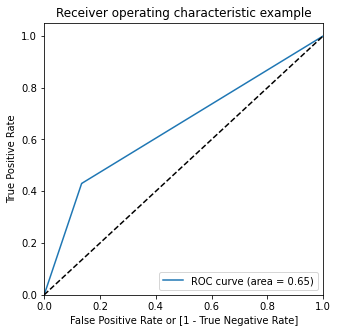

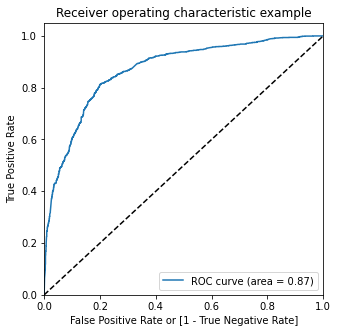

In [81]:
draw_roc(y_train_pred_model1.Converted, y_train_pred_model1.Conversion_Prob)
draw_roc(y_train_pred_model4.Converted, y_train_pred_model4.Conversion_Prob)

As we see Area under curve has greatly increased between first and last model .

#### Lets go ahead with tuning our model by selecting the best overall threshold considering other accuracy methods

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [83]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_model4[i]= y_train_pred_model4.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_model4.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
2006,0,0.190631,2006,0,1,1,0,0,0,0,0,0,0,0
5140,0,0.130514,5140,0,1,1,0,0,0,0,0,0,0,0
7588,1,0.287469,7588,0,1,1,1,0,0,0,0,0,0,0
5244,0,0.338406,5244,0,1,1,1,1,0,0,0,0,0,0
8663,0,0.049112,8663,0,1,0,0,0,0,0,0,0,0,0


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_model4.Converted, y_train_pred_model4[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.510712  1.000000  0.000000
0.1   0.1  0.574039  0.993831  0.135866
0.2   0.2  0.701323  0.946329  0.445589
0.3   0.3  0.766856  0.916101  0.611075
0.4   0.4  0.795526  0.842690  0.746297
0.5   0.5  0.794266  0.768044  0.821636
0.6   0.6  0.773157  0.682912  0.867354
0.7   0.7  0.744486  0.592844  0.902769
0.8   0.8  0.706364  0.476249  0.946555
0.9   0.9  0.629175  0.291178  0.981970


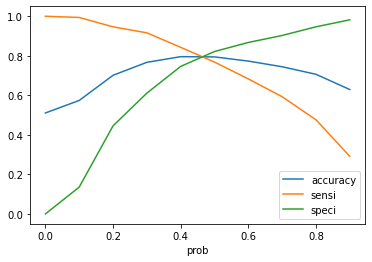

In [86]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 and less than 0.5 is the optimum point to take it as a cutoff probability.lets take 0.43


In [128]:
y_train_pred_model4['final_predicted'] = y_train_pred_model4.Conversion_Prob.map( lambda x: 1 if x > 0.43 else 0)

y_train_pred_model4.head()

,Converted,Conversion_Prob,Prospect ID,predicted,final_predicted
2006,0,0.190631,2006,0,0
5140,0,0.130514,5140,0,0
7588,1,0.287469,7588,0,0
5244,0,0.338406,5244,0,0
8663,0,0.049112,8663,0,0


In [129]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_model4.Converted, y_train_pred_model4.final_predicted)

0.8015122873345936

In [130]:
confusion2 = metrics.confusion_matrix(y_train_pred_model4.Converted, y_train_pred_model4.final_predicted )
confusion2

array([[1206,  347],
       [ 283, 1338]], dtype=int64)

In [131]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8254164096236891

In [133]:
# Let us calculate specificity
TN / float(TN+FP)

0.7765614938828075

## Precision and Recall

##### Precision
TP / TP + FP

In [134]:
from sklearn.metrics import precision_score, recall_score


In [135]:
precision_score(y_train_pred_model4.Converted, y_train_pred_model4.predicted)

0.8180026281208935

In [136]:
recall_score(y_train_pred_model4.Converted, y_train_pred_model4.predicted)

0.7680444170265268

It could be seen that model has higher precision that is out of all the rows identified as Converted around 81% are correctly classified


While we see how many percentage of actually converted could be identified by model as converted. Its 76% . 
While for this case we may need higher recall vs precision. 
As its important for business to identify as many high leads as possible

In [137]:
from sklearn.metrics import precision_recall_curve

Lets analyze from recall precision point what could be the optimal value for threshold


In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_model4.Converted, y_train_pred_model4.Conversion_Prob)

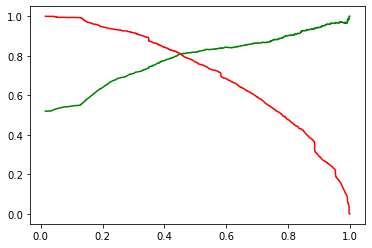

In [139]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

As we see the optimal is aroung 0.43 so we are good with our model

### Step 11: Making predictions on the test set

In [140]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [141]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Unreachable
8536,0,-1.039645,1,0,0,0,1,0,0,0
945,0,-0.366050,0,0,1,0,0,0,0,0
1550,0,-1.097835,0,1,0,0,0,0,0,0
8570,0,-0.685214,1,0,0,0,0,1,0,1
1410,0,-0.579414,1,0,0,0,0,0,0,0


In [142]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [143]:
y_test_pred = res.predict(X_test_sm)

In [144]:
y_test_pred[:10]

8536    0.288610
945     0.217435
1550    0.885164
8570    0.981686
1410    0.202037
5664    0.879544
5232    0.042983
6744    0.223768
6924    0.325128
3878    0.219610
dtype: float64

In [145]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [146]:
# Let's see the head
y_pred_1.head()

,0
8536,0.288610
945,0.217435
1550,0.885164
8570,0.981686
1410,0.202037


In [147]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [148]:
# Putting Prospect_ID to index
y_test_df['Prospect_id'] = y_test_df.index

In [149]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [150]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [151]:
y_pred_final.head()

,Converted,Prospect_id,0
0,0,8536,0.288610
1,0,945,0.217435
2,1,1550,0.885164
3,1,8570,0.981686
4,0,1410,0.202037


In [179]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [185]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)
y_pred_final['lead_score']= y_pred_final['Conversion_Prob']*100

In [186]:
y_pred_final.head()

,Converted,Prospect_id,Conversion_Prob,final_predicted,lead_score
0,0,8536,0.288610,0,28.861005
1,0,945,0.217435,0,21.743455
2,1,1550,0.885164,1,88.516371
3,1,8570,0.981686,1,98.168587
4,0,1410,0.202037,0,20.203668


In [159]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.78104335047759

In [162]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[502, 164],
       [134, 561]], dtype=int64)

In [168]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [169]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8071942446043165

In [170]:
# Let us calculate specificity
TN / float(TN+FP)

0.7537537537537538

In [171]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7737931034482759

In [172]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8071942446043165

In [173]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

0.78104335047759


#### Overall model performs equally well both on train and test data set. 

-=====================Train dataset--------------------Test dataset
- Sensitivity----------0.825----------------------------0.807
- Specificity----------0.77------------------------------0.75
- Precision-------------0.76------------------------------0.77
- Recall----------------0.81------------------------------0.80
- Accuracy-------------0.79------------------------------0.78          

# Interpreting the Model


In [174]:
X_train[col].columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Unreachable'],
      dtype='object')

 #### According to the final model, the variables that impact the outcome are,
    'Do Not Email' negatively impacts likelyhood of conversion
    'Total Time Spent on Website'has a positive impact
    'Lead Origin_Landing Page Submission'  negatively impacts likelyhood of conversion
    'Lead Origin_Lead Add Form'has a positive impact
    'Last Activity_Converted to Lead'negatively impacts likelyhood of conversion 
    'Last Activity_Email Bounced'negatively impacts likelyhood of conversion
    'Last Activity_SMS Sent'has a positive impact
    'What is your current occupation_Working Professional',
    'Last Notable Activity_Email Bounced'has a positive impact
    'Last Notable Activity_Unreachable' has a positive impact


# Most important variables to consider:
---
DoNot Email': If this variable is True or 1, then the log-odds decreases by 1.39

'Total Time Spent on Website' log odd increase by 1.0514 for every unit time spent on website, signifies interest in content

Lead Origin_Landing Page Submission- logg odd decreases if lead is collected from landing page. That is chance of entering information just to look at the content by user

Lead Origin_Lead Add Form - if customer lead is generated through channel there is high chance of being converted as logodds increase by 2.665

Last Activity_Converted to Lead and Last Activity_Email Bounced has negative impact that is -1.4 and -2.4499.

Last Activity Sms sent. if this is the last activity then log odds of converting increases by 0.9553

If its a workimng professional log odds of converted increases by 2.6884 compared to otehr occupation

'Last Notable Activity_Email Bounced' and Last Notable Activity_Unreachable' has likelihood of conversion, so better try again

## As a final step towards our conversion of probaility to Lead  Score, As we have already identified 0.43 is a cutoff and same can be told about the scores .

That is Probability *100

Above 43% lead score can be considered as customers with  high potential of being converted.



